<a href="https://colab.research.google.com/github/voshna123/tensorflow_practice/blob/main/practice_tf4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import zipfile

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zip_ref = zipfile.ZipFile("/content/10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2025-01-06 09:55:48--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.207, 64.233.170.207, 142.251.175.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.4MB/s    in 23s     

2025-01-06 09:56:11 (21.9 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
for dirpath, dirnames, filenames in os.walk("/content/10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/10_food_classes_all_data'.
There are 10 directories and 0 images in '/content/10_food_classes_all_data/train'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '/content/10_food_classes_all_data/train

In [4]:
test_dir = '10_food_classes_all_data/test/'
train_dir = '10_food_classes_all_data/train/'

In [5]:
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 0.5,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    rescale = 1./255
)

test_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

In [7]:
train_data = train_data_gen.flow_from_directory(train_dir,
                                                batch_size = 32,
                                                shuffle = True,
                                                class_mode = "categorical",
                                                target_size = (224,224))
test_data = test_data_gen.flow_from_directory(test_dir,
                                              batch_size = 32,
                                              shuffle = False,
                                              class_mode = "categorical",
                                              target_size = (224,224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [11]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 3,
                             padding = "valid"),
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding = "valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,
                         activation = "softmax")
])

l_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model1.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

hist = model1.fit(train_data,
           epochs = 5,
           validation_data = test_data,
           callbacks =[l_scheduler])

Epoch 1/5
234/235 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - accuracy: 0.1370 - loss: 2.3367

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 112s 457ms/step - accuracy: 0.1373 - loss: 2.3358 - val_accuracy: 0.2464 - val_loss: 2.0946 - learning_rate: 0.0010
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 442ms/step - accuracy: 0.2325 - loss: 2.1417 - val_accuracy: 0.2800 - val_loss: 2.0140 - learning_rate: 0.0011
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 103s 430ms/step - accuracy: 0.2526 - loss: 2.0778 - val_accuracy: 0.3288 - val_loss: 1.9099 - learning_rate: 0.0013
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 435ms/step - accuracy: 0.2869 - loss: 2.0595 - val_accuracy: 0.3148 - val_loss: 1.9512 - learning_rate: 0.0014
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 150s 470ms/step - accuracy: 0.2842 - loss: 2.0311 - val_accuracy: 0.3336 - val_loss: 1.9120 - learning_rate: 0.0016


In [12]:
model1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.3226 - loss: 1.9637


[1.911955714225769, 0.3336000144481659]

In [13]:
df = pd.DataFrame(hist.history)
df

,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.173200,2.231444,0.2464,2.094625,0.001000
1,0.238000,2.134403,0.2800,2.013983,0.001122
2,0.255867,2.070747,0.3288,1.909916,0.001259
3,0.283333,2.045407,0.3148,1.951196,0.001413
4,0.280533,2.028458,0.3336,1.911956,0.001585


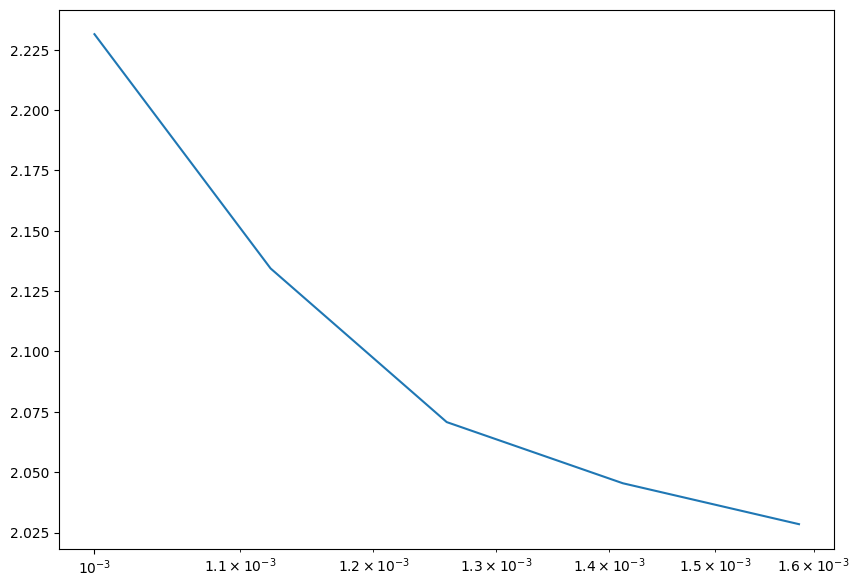

In [14]:
plt.figure(figsize = (10,7))
plt.semilogx(df['learning_rate'], df['loss'])

### best lr seems to be 1.25*10**-3